In [ ]:
import pandas as pd

path_data = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
df = pd.read_csv(path_data + 'co2.csv')
df.drop(columns='time',inplace=True)
df.head()

,Date,CO2
0,1981-05-01,342.74
1,1981-06-01,342.08
2,1981-07-01,340.32
3,1981-08-01,338.26
4,1981-09-01,336.52


# Exercício

1. Exiba a série de dados de emissões de Co2 em um gráfico
2. Empregue um modelo de regressão para estimar os valores da série
3. Calcule ou "mostre" o erro de previsões do seu modelo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


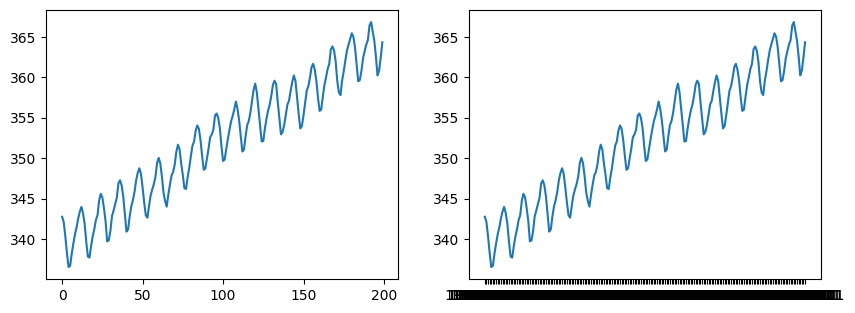

In [ ]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.plot(df.CO2)

plt.subplot(1,2,2)
plt.plot(df.Date,df.CO2)

plt.show()



In [ ]:
df.index = pd.to_datetime(df.Date)
df.drop(columns='Date',inplace=True)
df.head()


,CO2
Date,
1981-05-01,342.74
1981-06-01,342.08
1981-07-01,340.32
1981-08-01,338.26
1981-09-01,336.52


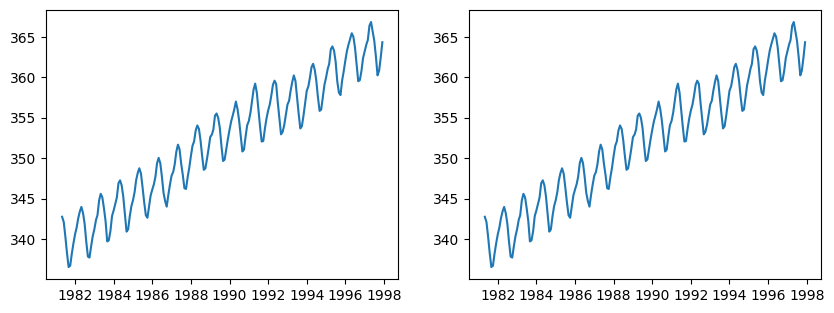

In [ ]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.plot(df.CO2)

plt.subplot(1,2,2)
plt.plot(df.index,df.CO2)

plt.show()

# Linear and non-Linear Regressors

* Linear

$$CO2 = a_0 + a_1 time$$

* non-Linear

$$CO2 = f(time)$$, where $f$ is some Machine Learning fuction

In [ ]:
df['time'] = np.array(range(len(df)))
df.head()

,CO2,time
Date,,
1981-05-01,342.74,0
1981-06-01,342.08,1
1981-07-01,340.32,2
1981-08-01,338.26,3
1981-09-01,336.52,4


RMSE: 2.2640135259428433


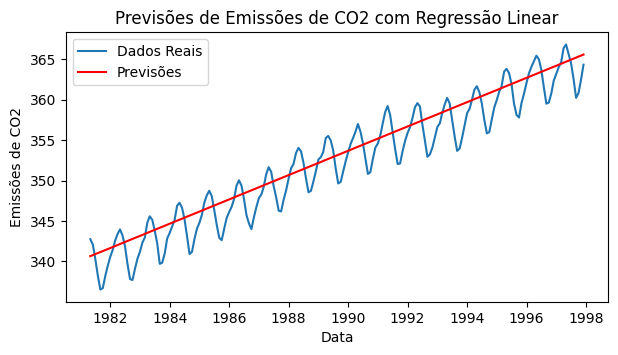

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# X = df.index
X = df[['time']]
y = df['CO2']

model = LinearRegression()
# model = KNeighborsRegressor(3)
# model = DecisionTreeRegressor(max_depth=3)

model.fit(X, y)

y_pred = model.predict(X)

# Calcular o erro médio quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse}')

# Plotar os resultados
plt.figure(figsize=(7, 3.5))
plt.plot(df.index, df['CO2'], label='Dados Reais')
plt.plot(df.index, y_pred+1, label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Emissões de CO2')
plt.title('Previsões de Emissões de CO2 com Regressão Linear')
plt.legend()
plt.show()


RMSE: 2.2515026895488512


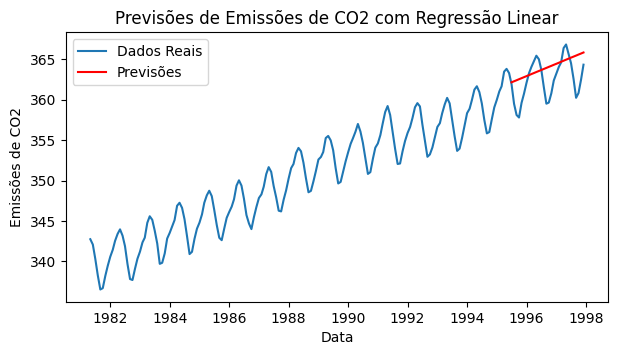

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# X = df.index
X = df[['time']]
y = df['CO2']

model = LinearRegression()
# model = KNeighborsRegressor(3)
# model = DecisionTreeRegressor(max_depth=3)

model.fit(X.iloc[0:-30], y.iloc[0:-30])

y_pred = model.predict(X.iloc[-30::])

# Calcular o erro médio quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(y.iloc[-30::], y_pred))
print(f'RMSE: {rmse}')

# Plotar os resultados
plt.figure(figsize=(7, 3.5))
plt.plot(df.index, df['CO2'], label='Dados Reais')
plt.plot(df.iloc[-30::].index, y_pred+1, label='Previsões', color='red')
plt.xlabel('Data')
plt.ylabel('Emissões de CO2')
plt.title('Previsões de Emissões de CO2 com Regressão Linear')
plt.legend()
plt.show()


# Time Series Forecast


**Instead**

* Linear **WRONG**

$$CO2 = a_0 + a_1 time$$

* non-Linear **WRONG**

$$CO2 = f(time)$$, where $f$ is some Machine Learning fuction

**Auto Regression**

$$CO2_t = a_0 + a_1 CO2_{t-1}$$

or, in more general way

$$CO2_t = a_0 + a_1 CO2_{t-1} + a_2 CO2_{t-2} + ... + a_n CO2_{t-n} + \epsilon$$

